# Building Regression Model with Keras

In this project, I will build a regression model using the deep learning Keras library, and then I will experiment with increasing the number of training epochs and changing number of hidden layers and you will see how changing these parameters impacts the performance of the model.

#### Importing Libraries

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

### Loading the dataset

In [18]:
df = pd.read_csv('https://cocl.us/concrete_data')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [19]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [20]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [21]:
predictor = df.drop(columns = ['Strength'])
target = df['Strength']
n_cols = predictor.shape[1]

In [22]:
predictor.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [23]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

## Section: A
Building the baseline Neural Network Model




In [24]:
def regression_model():
  #creating the model
  model = Sequential()
  #first hidden layer
  model.add(Dense(10, activation = 'relu', input_shape = (n_cols,)))
  #output layer
  model.add(Dense(1))
  #compiling the model
  model.compile(optimizer = 'adam', loss = 'mean_squared_error')
  return model

In [25]:
model = regression_model()

In [26]:
mean_sq_error = []
for i in range(1,51):
  X_train,X_test,y_train, y_test = train_test_split(predictor, df['Strength'],test_size = 0.3)
  res = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, verbose = 0)
  mean_squared_error = res.history['val_loss'][-1]
  print('Iteration--->', i, 'mean squared error----->',mean_squared_error )
  mean_sq_error.append(mean_squared_error)

Iteration---> 1 mean squared error-----> 114.92092895507812
Iteration---> 2 mean squared error-----> 94.17741394042969
Iteration---> 3 mean squared error-----> 87.03341674804688
Iteration---> 4 mean squared error-----> 67.53215026855469
Iteration---> 5 mean squared error-----> 64.21414947509766
Iteration---> 6 mean squared error-----> 80.02247619628906
Iteration---> 7 mean squared error-----> 55.96617126464844
Iteration---> 8 mean squared error-----> 70.28727722167969
Iteration---> 9 mean squared error-----> 61.35123825073242
Iteration---> 10 mean squared error-----> 54.93370819091797
Iteration---> 11 mean squared error-----> 58.0841178894043
Iteration---> 12 mean squared error-----> 66.39708709716797
Iteration---> 13 mean squared error-----> 48.5130729675293
Iteration---> 14 mean squared error-----> 51.276336669921875
Iteration---> 15 mean squared error-----> 49.182151794433594
Iteration---> 16 mean squared error-----> 47.912715911865234
Iteration---> 17 mean squared error-----> 48.07

In [27]:
print('mean of mean squared error:', np.mean(mean_sq_error))
print('standard daviation of mean squared error:', np.std(mean_sq_error))

mean of mean squared error: 55.94411376953125
standard daviation of mean squared error: 13.896112836175579


## Section: B
Normalizing the predictor columns

In [28]:
predictor = (predictor-predictor.mean())/predictor.std()
predictor.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [29]:
mean_sq_error = []
for i in range(1,51):
  X_train,X_test,y_train, y_test = train_test_split(predictor, df['Strength'],test_size = 0.3)
  res = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, verbose = 0)
  mean_squared_error = res.history['val_loss'][-1]
  print('Iteration--->', i, 'mean squared error----->',mean_squared_error )
  mean_sq_error.append(mean_squared_error)

Iteration---> 1 mean squared error-----> 749.7655029296875
Iteration---> 2 mean squared error-----> 292.0740661621094
Iteration---> 3 mean squared error-----> 183.6770782470703
Iteration---> 4 mean squared error-----> 111.27953338623047
Iteration---> 5 mean squared error-----> 112.56428527832031
Iteration---> 6 mean squared error-----> 71.45450592041016
Iteration---> 7 mean squared error-----> 68.31498718261719
Iteration---> 8 mean squared error-----> 60.875877380371094
Iteration---> 9 mean squared error-----> 49.45834732055664
Iteration---> 10 mean squared error-----> 57.024044036865234
Iteration---> 11 mean squared error-----> 44.935997009277344
Iteration---> 12 mean squared error-----> 44.09235763549805
Iteration---> 13 mean squared error-----> 50.500526428222656
Iteration---> 14 mean squared error-----> 49.68511962890625
Iteration---> 15 mean squared error-----> 39.100799560546875
Iteration---> 16 mean squared error-----> 54.63429641723633
Iteration---> 17 mean squared error-----> 

In [30]:
print('mean of mean squared error:', np.mean(mean_sq_error))
print('standard daviation of mean squared error:', np.std(mean_sq_error))

mean of mean squared error: 67.02201274871827
standard daviation of mean squared error: 106.3378246473775


## Section: C
Setting the epoch count to 100 for training

In [31]:
mean_sq_error = []
for i in range(1,51):
  X_train,X_test,y_train, y_test = train_test_split(predictor, df['Strength'],test_size = 0.3)
  res = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, verbose = 0)
  mean_squared_error = res.history['val_loss'][-1]
  print('Iteration--->', i, 'mean squared error----->',mean_squared_error )
  mean_sq_error.append(mean_squared_error)

Iteration---> 1 mean squared error-----> 37.38007736206055
Iteration---> 2 mean squared error-----> 32.540470123291016
Iteration---> 3 mean squared error-----> 42.34327697753906
Iteration---> 4 mean squared error-----> 37.019187927246094
Iteration---> 5 mean squared error-----> 38.971763610839844
Iteration---> 6 mean squared error-----> 37.568572998046875
Iteration---> 7 mean squared error-----> 31.379030227661133
Iteration---> 8 mean squared error-----> 39.05885696411133
Iteration---> 9 mean squared error-----> 36.84315490722656
Iteration---> 10 mean squared error-----> 37.591949462890625
Iteration---> 11 mean squared error-----> 36.410335540771484
Iteration---> 12 mean squared error-----> 35.89048767089844
Iteration---> 13 mean squared error-----> 36.10889434814453
Iteration---> 14 mean squared error-----> 38.508914947509766
Iteration---> 15 mean squared error-----> 36.65087127685547
Iteration---> 16 mean squared error-----> 32.48939895629883
Iteration---> 17 mean squared error----->

In [32]:
print('mean of mean squared error:', np.mean(mean_sq_error))
print('standard daviation of mean squared error:', np.std(mean_sq_error))

mean of mean squared error: 36.91457672119141
standard daviation of mean squared error: 2.75228126572097


## Section: D
Neural Network with three Hidden layers, each of 10 nodes and ReLU activation Function

In [33]:
def regression_model():
  #creating the model
  model = Sequential()
  #first hidden layer
  model.add(Dense(10, activation = 'relu', input_shape = (n_cols,)))
  #second hidden layer
  model.add(Dense(10, activation = 'relu'))
  #third hidden layer
  model.add(Dense(10, activation = 'relu'))
  #output layer
  model.add(Dense(1))
  #compiling the model
  model.compile(optimizer = 'adam', loss = 'mean_squared_error')
  return model

In [34]:
model = regression_model()

In [35]:
mean_sq_error = []
for i in range(1,51):
  X_train,X_test,y_train, y_test = train_test_split(predictor, df['Strength'],test_size = 0.3)
  res = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, verbose = 0)
  mean_squared_error = res.history['val_loss'][-1]
  print('Iteration--->', i, 'mean squared error----->',mean_squared_error )
  mean_sq_error.append(mean_squared_error)

Iteration---> 1 mean squared error-----> 134.85989379882812
Iteration---> 2 mean squared error-----> 83.92335510253906
Iteration---> 3 mean squared error-----> 71.07125854492188
Iteration---> 4 mean squared error-----> 40.500892639160156
Iteration---> 5 mean squared error-----> 45.696449279785156
Iteration---> 6 mean squared error-----> 44.826744079589844
Iteration---> 7 mean squared error-----> 39.3478889465332
Iteration---> 8 mean squared error-----> 33.13433074951172
Iteration---> 9 mean squared error-----> 35.00434112548828
Iteration---> 10 mean squared error-----> 40.123023986816406
Iteration---> 11 mean squared error-----> 36.01560592651367
Iteration---> 12 mean squared error-----> 36.12113952636719
Iteration---> 13 mean squared error-----> 36.834571838378906
Iteration---> 14 mean squared error-----> 31.618337631225586
Iteration---> 15 mean squared error-----> 32.108253479003906
Iteration---> 16 mean squared error-----> 30.435970306396484
Iteration---> 17 mean squared error----->

In [36]:
print('mean of mean squared error:', np.mean(mean_sq_error))
print('standard daviation of mean squared error:', np.std(mean_sq_error))

mean of mean squared error: 33.73752418518066
standard daviation of mean squared error: 18.1131076923468


## Comparing Mean Squared Error in all the 4 sections

Text(0, 0.5, 'Mean Squared Error')

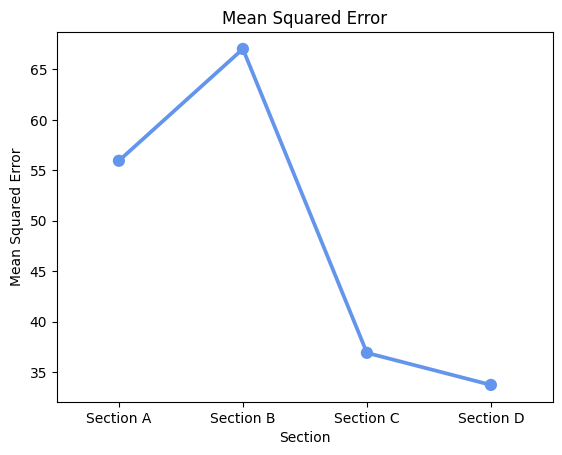

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pointplot(x = ['Section A', 'Section B', 'Section C', 'Section D'], y = [55.94411376953125,67.02201274871827,36.91457672119141,33.73752418518066], color = '#6495ed').set_title('Mean Squared Error')
plt.xlabel('Section')
plt.ylabel('Mean Squared Error')